In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv', encoding= 'ISO-8859-1', low_memory=False)

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [7]:
# importing simple_preprocess
from gensim.utils import simple_preprocess

In [8]:
# preprocess all the articles of the data set
preprocessed_email = df.v2.apply(lambda x: simple_preprocess(x))

In [9]:
preprocessed_email

0       [go, until, jurong, point, crazy, available, o...
1                             [ok, lar, joking, wif, oni]
2       [free, entry, in, wkly, comp, to, win, fa, cup...
3          [dun, say, so, early, hor, already, then, say]
4       [nah, don, think, he, goes, to, usf, he, lives...
                              ...                        
5567    [this, is, the, nd, time, we, have, tried, con...
5568           [will, ì_, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, so, any, othe...
5570    [the, guy, did, some, bitching, but, acted, li...
5571                     [rofl, its, true, to, its, name]
Name: v2, Length: 5572, dtype: object

In [10]:
# First line Tokenize
preprocessed_email[0]

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'great',
 'world',
 'la',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat']

# CBOW

In [11]:
# import word2vec
from gensim.models import Word2Vec

In [12]:
# cbow model
# train a word2vec model from the given data set
cbow_w2v_model = Word2Vec(preprocessed_email, size=300, window=9, min_count=2, sg=0) 

In [13]:
# vocabulary size
print('cbow model vocabulary size:', len(cbow_w2v_model.wv.vocab))

cbow model vocabulary size: 3892


In [14]:
# cbow model vocabulary
list(cbow_w2v_model.wv.vocab.items())[:20]

[('go', <gensim.models.keyedvectors.Vocab at 0x7fdeef7f7210>),
 ('until', <gensim.models.keyedvectors.Vocab at 0x7fdeec85a690>),
 ('point', <gensim.models.keyedvectors.Vocab at 0x7fdeec85a4d0>),
 ('crazy', <gensim.models.keyedvectors.Vocab at 0x7fdeec7d0fd0>),
 ('available', <gensim.models.keyedvectors.Vocab at 0x7fdeec7d0510>),
 ('only', <gensim.models.keyedvectors.Vocab at 0x7fdeec7d0350>),
 ('in', <gensim.models.keyedvectors.Vocab at 0x7fdeec7d0f50>),
 ('bugis', <gensim.models.keyedvectors.Vocab at 0x7fdeed9cb3d0>),
 ('great', <gensim.models.keyedvectors.Vocab at 0x7fdeec7d0550>),
 ('world', <gensim.models.keyedvectors.Vocab at 0x7fdeec7d04d0>),
 ('la', <gensim.models.keyedvectors.Vocab at 0x7fdeec7bd4d0>),
 ('buffet', <gensim.models.keyedvectors.Vocab at 0x7fdeec7bde90>),
 ('cine', <gensim.models.keyedvectors.Vocab at 0x7fdeec7bdf90>),
 ('there', <gensim.models.keyedvectors.Vocab at 0x7fdeec7bd810>),
 ('got', <gensim.models.keyedvectors.Vocab at 0x7fdeec7bdb50>),
 ('wat', <gensim.m

In [15]:
words_go_sg = cbow_w2v_model.wv.most_similar('go')

In [16]:
words_go_sg

[('meet', 0.9999715089797974),
 ('out', 0.9999560117721558),
 ('wan', 0.9999555945396423),
 ('him', 0.9999537467956543),
 ('going', 0.9999526143074036),
 ('dun', 0.9999512434005737),
 ('went', 0.9999509453773499),
 ('wat', 0.9999508857727051),
 ('cant', 0.999950647354126),
 ('take', 0.9999503493309021)]

In [17]:
cbow_w2v_model.wv.most_similar('go')

[('meet', 0.9999715089797974),
 ('out', 0.9999560117721558),
 ('wan', 0.9999555945396423),
 ('him', 0.9999537467956543),
 ('going', 0.9999526143074036),
 ('dun', 0.9999512434005737),
 ('went', 0.9999509453773499),
 ('wat', 0.9999508857727051),
 ('cant', 0.999950647354126),
 ('take', 0.9999503493309021)]

In [18]:
# plots w2v embeddings of a given word list using cbow model
def plot_cbow_w2v(word_list):
    X = cbow_w2v_model[word_list]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    # show
    plt.figure(figsize=(6,15))
    plt.show()

In [19]:
from sklearn.decomposition import PCA

In [20]:
# generate similar word lists using cbow model
words_music_cb = cbow_w2v_model.wv.most_similar('music')
words_football_cb = cbow_w2v_model.wv.most_similar('football')

# combine word lists 
words_cb = words_go_sg + words_music_cb + words_football_cb

# extract only the word and not the similarity score
words_cb = list(map(lambda x: x[0], words_cb))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


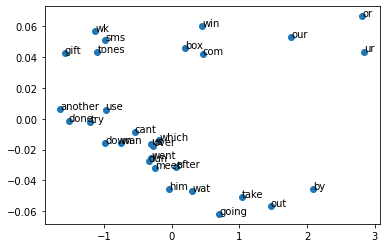

<Figure size 432x1080 with 0 Axes>

In [21]:
plot_cbow_w2v(words_cb)

## Skipgram

In [22]:
# skipgram model
# train a word2vec model from the given data set
skgram_w2v_model = Word2Vec(preprocessed_email, size=300, window=9, min_count=2, sg=1)

In [23]:
# vocabulary size


print('skgram model vocabulary size:', len(skgram_w2v_model.wv.vocab))

skgram model vocabulary size: 3892


In [24]:
# skipgram model vocabulary
list(skgram_w2v_model.wv.vocab.items())[:20]

[('go', <gensim.models.keyedvectors.Vocab at 0x7fdee789a990>),
 ('until', <gensim.models.keyedvectors.Vocab at 0x7fdee789a250>),
 ('point', <gensim.models.keyedvectors.Vocab at 0x7fdee789ad10>),
 ('crazy', <gensim.models.keyedvectors.Vocab at 0x7fdee789ae50>),
 ('available', <gensim.models.keyedvectors.Vocab at 0x7fdee789a910>),
 ('only', <gensim.models.keyedvectors.Vocab at 0x7fdee789ab10>),
 ('in', <gensim.models.keyedvectors.Vocab at 0x7fdee789aa10>),
 ('bugis', <gensim.models.keyedvectors.Vocab at 0x7fdee789aa90>),
 ('great', <gensim.models.keyedvectors.Vocab at 0x7fdee789af10>),
 ('world', <gensim.models.keyedvectors.Vocab at 0x7fdee789ac50>),
 ('la', <gensim.models.keyedvectors.Vocab at 0x7fdee789a9d0>),
 ('buffet', <gensim.models.keyedvectors.Vocab at 0x7fdee789a3d0>),
 ('cine', <gensim.models.keyedvectors.Vocab at 0x7fdee789a710>),
 ('there', <gensim.models.keyedvectors.Vocab at 0x7fdee789a5d0>),
 ('got', <gensim.models.keyedvectors.Vocab at 0x7fdee789a4d0>),
 ('wat', <gensim.m

In [25]:
# Embedding of particular word
skgram_w2v_model.wv.get_vector('go')

array([-1.27088130e-01, -1.55557677e-01, -1.01333767e-01, -9.31219012e-02,
       -4.85609286e-02, -3.96896452e-02, -1.00624301e-01, -2.38717608e-02,
        1.16647780e-02, -1.16351619e-01,  2.15108451e-02, -6.13734759e-02,
        3.90364882e-03,  1.02849133e-01,  8.88796076e-02, -4.25964780e-02,
       -1.69741645e-01, -1.46360487e-01,  1.31135941e-01,  1.95137367e-01,
       -3.28547917e-02,  2.23647848e-01,  6.05562776e-02, -4.30498924e-03,
        2.84675825e-02, -7.38693178e-02, -1.59329474e-02,  1.41504884e-01,
       -1.15189970e-01, -5.88600896e-02, -3.85872759e-02, -5.60099371e-02,
       -8.91150311e-02, -2.11682506e-02,  2.18422953e-02,  1.39875054e-01,
        1.21847853e-01,  3.46482880e-02, -4.90888208e-02, -1.94849327e-01,
        7.41330981e-02, -1.41216502e-01,  1.59373730e-01,  5.36349081e-02,
       -3.71771336e-01, -8.29127803e-02,  8.13323408e-02, -3.80411483e-02,
        3.68143730e-02, -3.13997269e-02,  2.55102485e-01,  2.33179599e-01,
       -1.05977757e-02, -

In [26]:
# Embedding of particular word
cbow_w2v_model.wv.get_vector('go').shape

(300,)

In [27]:
words_go_sg1 = skgram_w2v_model.wv.most_similar('go')

In [28]:
words_go_sg1

[('meet', 0.9370877146720886),
 ('den', 0.9288575649261475),
 ('then', 0.9250205755233765),
 ('wan', 0.9216448068618774),
 ('ard', 0.9123331308364868),
 ('oso', 0.9105517268180847),
 ('yup', 0.9101358652114868),
 ('ì_', 0.9066873788833618),
 ('liao', 0.9048868417739868),
 ('until', 0.9045787453651428)]

## Pretrained word2vec model from Google

In [29]:
filename ="/content/drive/MyDrive/GoogleNews-vectors-negative300.bin"

In [30]:
from gensim.models import KeyedVectors

# load into gensim
google_w2vec = KeyedVectors.load_word2vec_format(filename, binary=True)

In [31]:
def get_embedding_w2v(doc_tokens, pre_trained):
    embeddings = []
    # if pre_trained = 1; use Google's model else use our own model
    if pre_trained == 1:
        model = google_w2vec
    # if pre_trained = 0; CBOW Model  
    elif pre_trained == 0:
        model = cbow_w2v_model
    # esle; SKIPGRAM Model      
    else:
        model = skgram_w2v_model
    # iterate over tokens to extract their vectors    
    for tok in doc_tokens:
        if tok in model.wv.vocab:
            embeddings.append(model.wv.word_vec(tok))
    # mean the vectors of individual words to get the vector of the statement
    return np.mean(embeddings, axis=0)

In [32]:
# general preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [110]:
# create X from w2vec
X_w2v_model = preprocessed_email.apply(lambda x: get_embedding_w2v(x, pre_trained=0))
#X_w2v_model = pd.DataFrame(X_w2v_model.tolist())
#print('X shape:', X_w2v_model.shape)

In [111]:
# label encode the 'label' 
lencod = LabelEncoder()
# fit_transform() converts the text to numbers
df.v1 = lencod.fit_transform(df.v1)

# split into train and test
y = df.v1
X_train_wm, X_test_wm, y_train_wm, y_test_wm = train_test_split(X_w2v_model, y, test_size=0.2, random_state=42)

In [112]:
# build a text classification model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize GaussianNB classifier
model_1 = GaussianNB()
# Fit the model on the train dataset
model_1 = model_1.fit(X_train_wm, y_train_wm)
# Make predictions on the test dataset
pred_1 = model_1.predict(X_test_wm)

# check the accuracy of the model
print("Accuracy:", accuracy_score(y_test_wm, pred_1)*100, "%")

ValueError: ignored

In [113]:
# create X from w2vec
X_w2v_model = preprocessed_email.apply(lambda x: get_embedding_w2v(x, pre_trained=1))
#X_w2v_model = pd.DataFrame(X_w2v_model.tolist())
#print('X shape:', X_w2v_model.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [114]:
# label encode the 'label' 
lencod = LabelEncoder()
# fit_transform() converts the text to numbers
df.v1 = lencod.fit_transform(df.v1)

# split into train and test
y = df.v1
X_train_wm1, X_test_wm1, y_train_wm1, y_test_wm1 = train_test_split(X_w2v_model, y, test_size=0.2, random_state=42)

In [115]:
# build a text classification model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize GaussianNB classifier
model_2 = GaussianNB()
# Fit the model on the train dataset
model_2 = model_2.fit(X_train_wm1, y_train_wm1)
# Make predictions on the test dataset
pred_2 = model_2.predict(X_test_wm1)

# check the accuracy of the model
print("Accuracy:", accuracy_score(y_test_wm1, pred_2)*100, "%")

ValueError: ignored

In [116]:
# create X from w2vec
X_w2v_model = preprocessed_email.apply(lambda x: get_embedding_w2v(x, pre_trained=2))
#X_w2v_model = pd.DataFrame(X_w2v_model.tolist())
#print('X shape:', X_w2v_model.shape)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [117]:
# label encode the 'label' 
lencod = LabelEncoder()
# fit_transform() converts the text to numbers
df.v1 = lencod.fit_transform(df.v1)

# split into train and test
y = df.v1
X_train_wm2, X_test_wm2, y_train_wm2, y_test_wm2 = train_test_split(X_w2v_model, y, test_size=0.2, random_state=42)

In [118]:
# build a text classification model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize GaussianNB classifier
model_3 = GaussianNB()
# Fit the model on the train dataset
model_3 = model_3.fit(X_train_wm2, y_train_wm2)
# Make predictions on the test dataset
pred_3 = model_3.predict(X_test_wm2)

# check the accuracy of the model
print("Accuracy:", accuracy_score(y_test_wm2, pred_3)*100, "%")

ValueError: ignored